# Goals
The goals of this project are:
* Getting acquainted with the data
* Clean the data so it is ready for analysis
* Develop some questions for analysis
* Analyze variables within the data to gain patterns and insights on these questions

We will start by importing the necessary libraries and loading the data.

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
marketing_data = pd.read_csv('marketing_data.csv')
pd.set_option('display.max_columns', None)

marketing_data.head()

import warnings
warnings.filterwarnings('ignore')


# Data Info
Some insights we can draw from the data are:
1. There are 28 coumns and 2240 rows.
2. The data types for the columns are mostly integers.
3. The 'income' column has missing data, values that are not integers or floats, and an extra space in the column name, so data cleaning becomes necesary for this column prior to EDA.
4. The columns can be renamed for more consistency.

In [3]:
marketing_data.columns

Index(['id', 'YearBirth', 'Education', 'MaritalStatus', 'Income', 'Kidhome',
       'Teenhome', 'DtCustomer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProducts', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [4]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2240 non-null   int64 
 1   YearBirth            2240 non-null   int64 
 2   Education            2240 non-null   object
 3   MaritalStatus        2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   DtCustomer           2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProducts      2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [5]:
marketing_data.isnull().sum()

id                      0
YearBirth               0
Education               0
MaritalStatus           0
Income                 24
Kidhome                 0
Teenhome                0
DtCustomer              0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProducts         0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [6]:
print(marketing_data.describe())

                 id    YearBirth      Kidhome     Teenhome      Recency  \
count   2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804     0.444196     0.506250    49.109375   
std     3246.662198    11.984069     0.538398     0.544538    28.962453   
min        0.000000  1893.000000     0.000000     0.000000     0.000000   
25%     2828.250000  1959.000000     0.000000     0.000000    24.000000   
50%     5458.500000  1970.000000     0.000000     0.000000    49.000000   
75%     8427.750000  1977.000000     1.000000     1.000000    74.000000   
max    11191.000000  1996.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000

# Data Cleaning
As we have mentioned, the 'Income' column could use some cleaning. The column names overall could also be cleaned for consistency. To do this, the following is done:
1. Put all columns in snake case format using regex and list comprehension
2. Change 'Income' values to floats
3. Set the values as floats

The Income distribution is then plotted using a bloxplots. Since we have one large outlier, it is removed from the marketing_data. Next, the missing values are replaced with the mean income using the .mean() method.

Income is one of the main variables that will be explored in the analysis, so it is essential that it is tidy and exploration ready


In [7]:
# Cleaning the column

#taking dollar sign out of values and converting to float
marketing_data['Income'] = marketing_data['Income'].replace('[$,]', '', regex=True).astype(float)

In [8]:
# Summary stats
print(marketing_data['Income'].describe())

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64


In [9]:
# putting all columns into snake case format
marketing_data.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', x).lower() for x in marketing_data.columns]

In [10]:
print(marketing_data.columns)

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mnt_wines', 'mnt_fruits',
       'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products',
       'mnt_gold_products', 'num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month',
       'accepted_cmp3', 'accepted_cmp4', 'accepted_cmp5', 'accepted_cmp1',
       'accepted_cmp2', 'response', 'complain', 'country'],
      dtype='object')


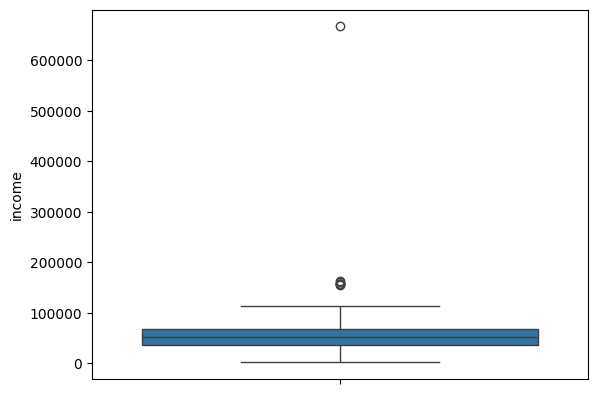

In [11]:
plt.figure()
sns.boxplot(marketing_data["income"])
plt.show()

The boxplot shows outliers on top, there is an extreme outlier so we'll remove it from the dataset.

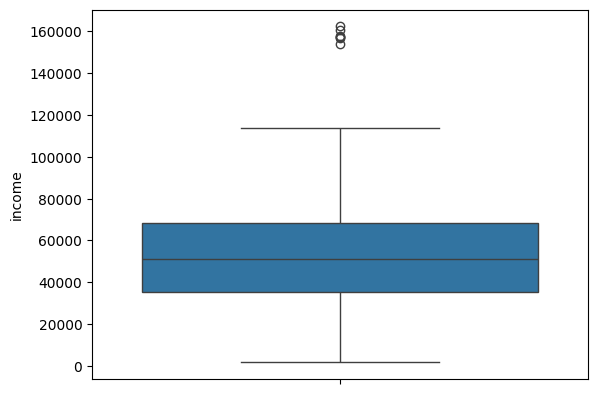

count      2215.000000
mean      51969.861400
std       21526.320095
min        1730.000000
25%       35284.000000
50%       51373.000000
75%       68487.000000
max      162397.000000
Name: income, dtype: float64

In [12]:
# remove incomes below 300000
marketing_data = marketing_data[marketing_data['income']<300000]

plt.figure()
sns.boxplot(marketing_data["income"])
plt.show()


marketing_data['income'].describe()

In [13]:
marketing_data['income'] = marketing_data['income'].fillna(marketing_data['income'].mean())

Since there we're only 24 points of missing data in the 'income' column, we can safely replace them with the mean.

# Adding an age column
The marketing_data DataFrame contains a year_birth column, however, a age column is not present. We can add an age column by subtracting the year_birth column from the current year.


In [14]:
marketing_data['age'] = 2025 - marketing_data['year_birth']

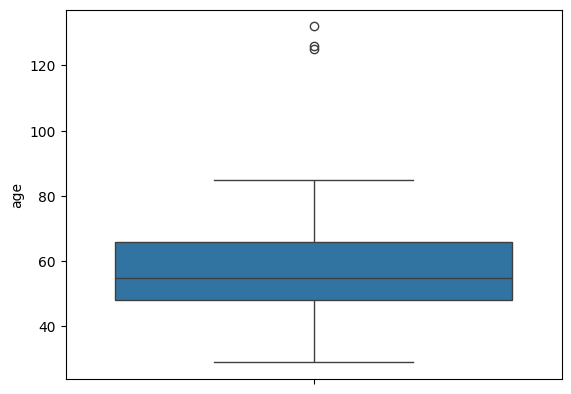

In [15]:
plt.figure()
sns.boxplot(marketing_data['age'])
plt.show()

In [16]:
marketing_data['age'].describe()

count    2215.000000
mean       56.183296
std        11.987000
min        29.000000
25%        48.000000
50%        55.000000
75%        66.000000
max       132.000000
Name: age, dtype: float64

In [17]:
marketing_data = marketing_data[marketing_data['age'] < 100]

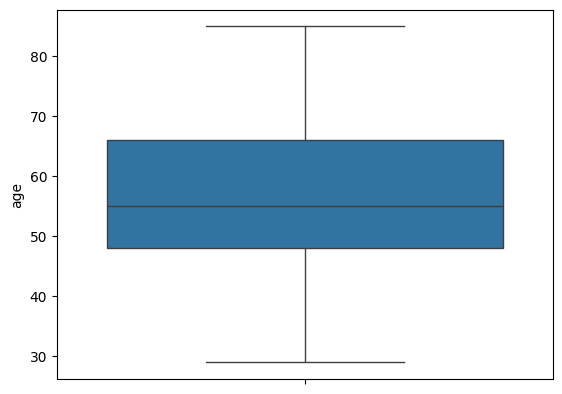

count    2212.000000
mean       56.086347
std        11.701599
min        29.000000
25%        48.000000
50%        55.000000
75%        66.000000
max        85.000000
Name: age, dtype: float64

In [18]:
plt.figure()
sns.boxplot(marketing_data["age"])
plt.show()

marketing_data["age"].describe()


After we remove the outliers the age distribution now is symmetric and ready for analysis.

# Checking the Education Feature
The education feature will also be focused on in the analysis.

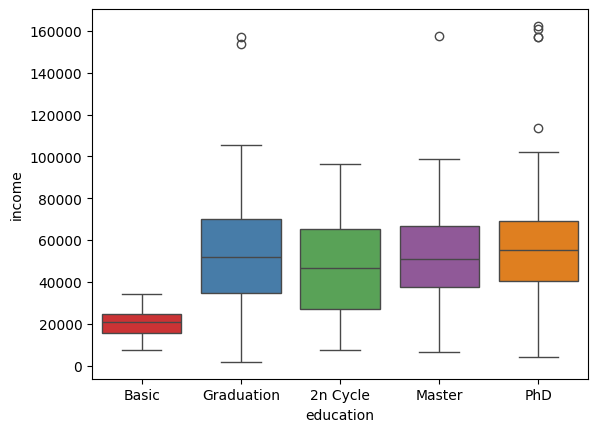

In [19]:
from seaborn import color_palette, palettes


plt.figure()
sns.boxplot(x = marketing_data["education"], y = marketing_data["income"], order=["Basic", "Graduation", "2n Cycle", "Master", "PhD"], palette="Set1")

plt.show()


We observe that there is an extreme outlier in the Graduation Category which seems to be like an anomaly. We will remove this outlier in the next section.

In [20]:
marketing_data = marketing_data[marketing_data['income'] < 200000]

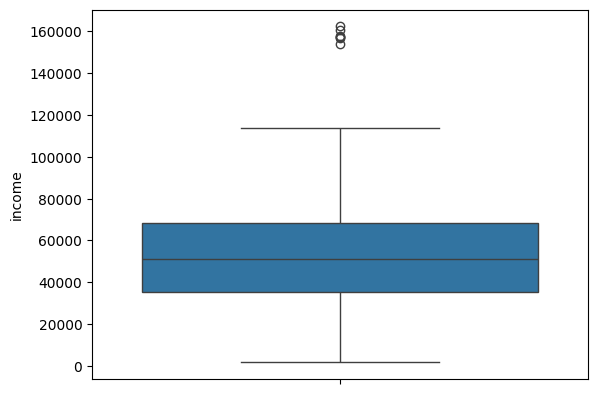

count      2212.000000
mean      51958.810579
std       21527.278844
min        1730.000000
25%       35233.500000
50%       51371.000000
75%       68487.000000
max      162397.000000
Name: income, dtype: float64

In [21]:
plt.figure()
sns.boxplot(marketing_data["income"])
plt.show()

marketing_data["income"].describe()

# Exploratory Data Analysis
After some data cleaning and tidying, the DataFrame is ready for EDA. The following independent variables will be explored:
1. income
2. education
3. age

The goal is to be able to see how these independent variables associate with the other dependent variables:
* `mnt_wines`
* `mnt_fruits`
* `mnt_meat_products`
* `mnt_fish_products`
* `mnt_sweet_products`  
* `mnt_gold_products`  
* `num_deals_purchases`
* `num_web_purchases`  
* `num_catalog_purchases`  
* `num_store_purchases`

We want to find out through summary statistics and visualizations how the following questions can be answered:
* **Q1**. Does a shopper's income, education level, and/or age relate to their purchasing behaviour?




# The Big Picture
In order to see the dataset as a whole, DataFrame.hist() method is used. It will give us a full view of all numerical variables in the distribution. Most of the amount bought and number purchased variables are right-skewed and have similar distributions.

Next, correlations between all the numerical variables are viewed using a heat matrix. The heat matrix shows that income has the strongest association with numerous variables. Interestingly, it shows that age may not be a huge factor overall. This is something to look into a little bit more deeper in the analysis.


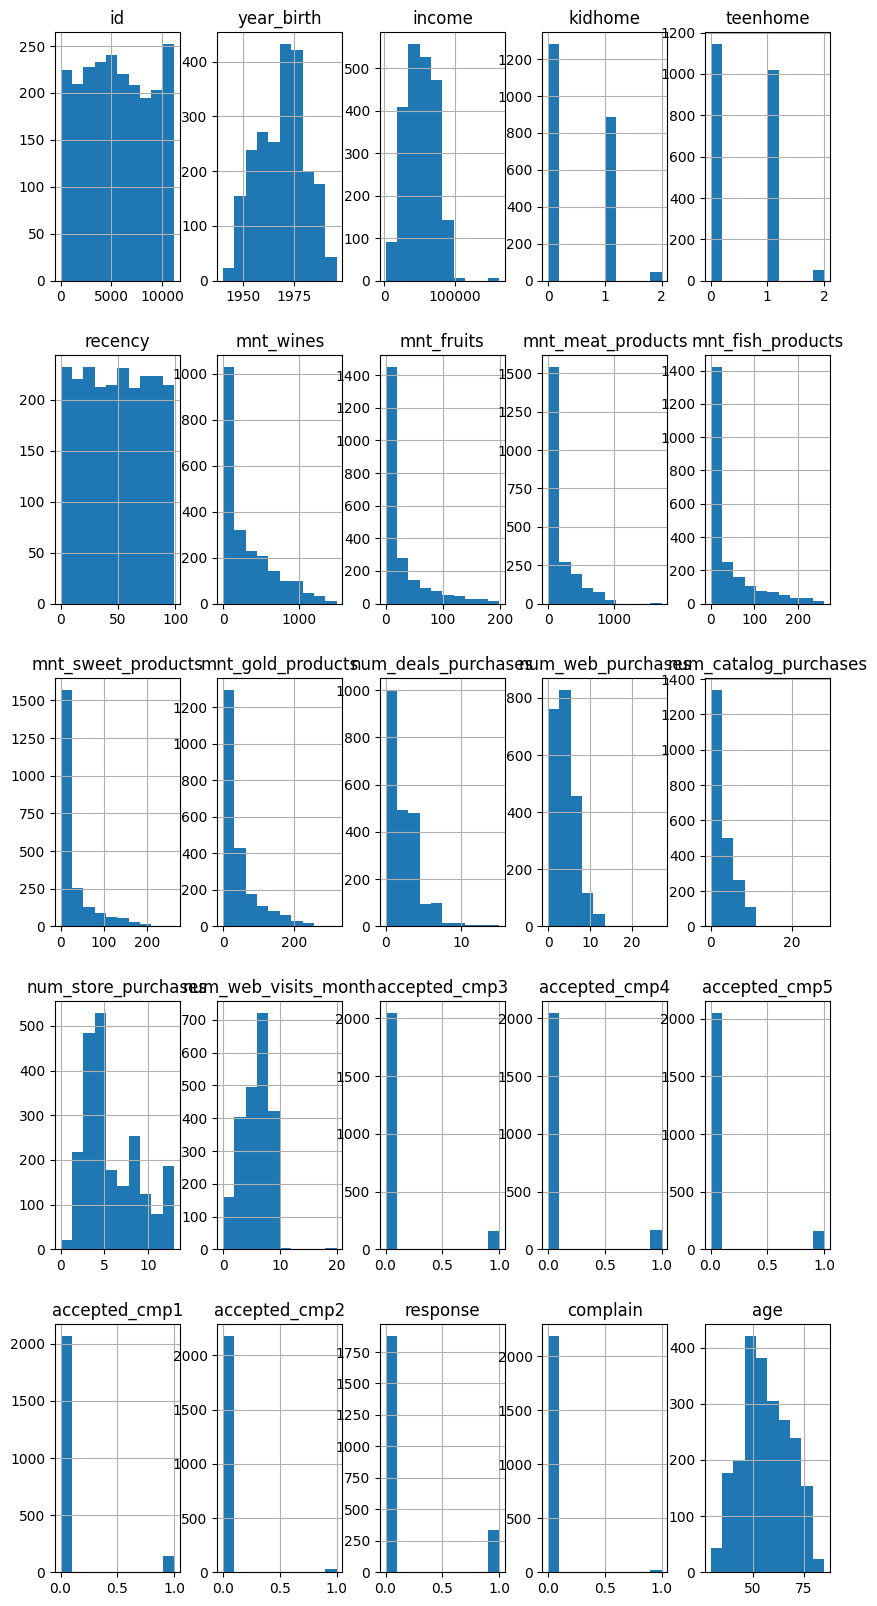

In [22]:
fig = plt.figure(figsize=(10, 20))
ax = fig.gca()
marketing_data.hist(ax=ax)
plt.show()


In [28]:
marketing_data.corr(numeric_only=True)

,id,year_birth,income,kidhome,teenhome,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_products,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,response,complain,age
id,1.000000,0.005086,0.000905,0.000971,-0.003508,-0.044147,-0.018906,0.010008,-0.003706,-0.022405,-0.004381,-0.008013,-0.040849,-0.017232,-0.000404,-0.011733,-0.008610,-0.035668,-0.023692,-0.004441,-0.017989,-0.014901,-0.021112,0.031839,-0.005086
year_birth,0.005086,1.000000,-0.199977,0.237497,-0.361932,-0.015694,-0.164615,-0.013447,-0.033622,-0.041154,-0.021516,-0.059779,-0.066156,-0.162265,-0.125856,-0.138998,0.120282,0.061097,-0.070035,0.019025,-0.011941,-0.007821,0.020937,-0.004602,-1.000000
income,0.000905,-0.199977,1.000000,-0.514523,0.034565,0.007965,0.688209,0.507354,0.692279,0.520040,0.523599,0.388299,-0.108207,0.459265,0.696589,0.631424,-0.650257,-0.015152,0.219633,0.395569,0.327524,0.104036,0.161387,-0.027900,0.199977
kidhome,0.000971,0.237497,-0.514523,1.000000,-0.039066,0.010623,-0.497203,-0.373258,-0.439031,-0.388643,-0.377843,-0.354922,0.216594,-0.372327,-0.504598,-0.501863,0.447258,0.016135,-0.162111,-0.204582,-0.174261,-0.081911,-0.077901,0.037067,-0.237497
teenhome,-0.003508,-0.361932,0.034565,-0.039066,1.000000,0.014392,0.003945,-0.175905,-0.261134,-0.205235,-0.163107,-0.018579,0.386805,0.162239,-0.112477,0.049212,0.130985,-0.042797,0.038168,-0.190119,-0.145198,-0.015633,-0.154402,0.007746,0.361932
recency,-0.044147,-0.015694,0.007965,0.010623,0.014392,1.000000,0.015981,-0.005257,0.022914,0.000788,0.025244,0.018148,0.002591,-0.005680,0.024197,-0.000460,-0.018965,-0.032361,0.017520,0.000233,-0.021147,-0.001429,-0.200114,0.005713,0.015694
mnt_wines,-0.018906,-0.164615,0.688209,-0.497203,0.003945,0.015981,1.000000,0.385844,0.568081,0.396915,0.389583,0.391461,0.009117,0.553663,0.634237,0.640219,-0.321616,0.061360,0.373349,0.472889,0.351610,0.206309,0.246320,-0.036420,0.164615
mnt_fruits,0.010008,-0.013447,0.507354,-0.373258,-0.175905,-0.005257,0.385844,1.000000,0.546740,0.593038,0.571474,0.393459,-0.134191,0.302301,0.485611,0.459875,-0.417741,0.014644,0.006598,0.208990,0.192417,-0.009924,0.123007,-0.002956,0.013447
mnt_meat_products,-0.003706,-0.033622,0.692279,-0.439031,-0.261134,0.022914,0.568081,0.546740,1.000000,0.572986,0.534624,0.357556,-0.121128,0.306841,0.733787,0.486349,-0.539194,0.018416,0.091677,0.375252,0.313379,0.043549,0.237966,-0.021017,0.033622
mnt_fish_products,-0.022405,-0.041154,0.520040,-0.388643,-0.205235,0.000788,0.396915,0.593038,0.572986,1.000000,0.583484,0.426299,-0.143147,0.299428,0.532241,0.457885,-0.446151,-0.000276,0.016058,0.194793,0.261712,0.002322,0.108135,-0.019098,0.041154


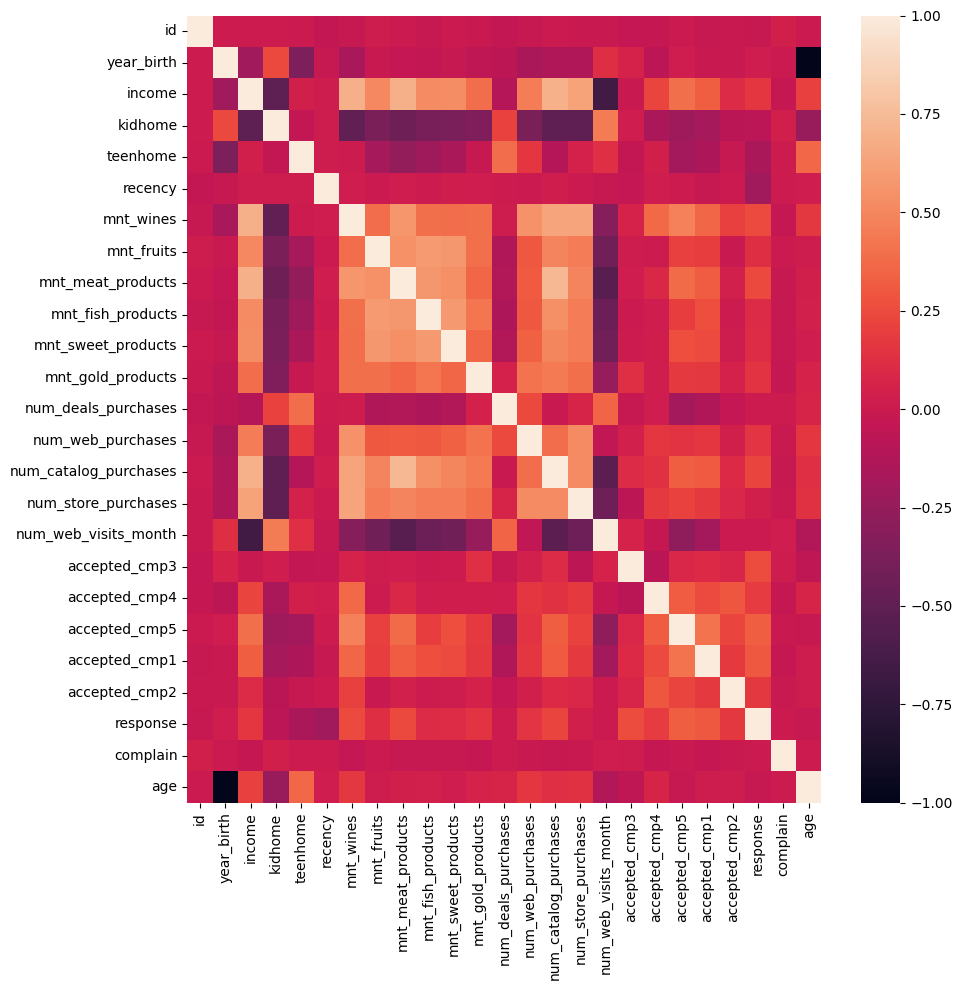

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(data=marketing_data.corr(numeric_only=True),annot=False)
plt.tight_layout()
plt.show()

The table of correlations doesn't offer us much help as there are too many numbers to read through. However, the heat map shows that income will be the major variable to focus on in the analysis. 

# Purchasing Behaviour by Income Level
Now it's time to look into the big question. A for loop is used to see the relationship between income and each num_{type}_purchases variable. The hue parameter with the education variable is used to see if there are any patterns that can be deciphered between education and num_{type}_purchases.

First scatterplots are used and then regression plots are used for this analysis.

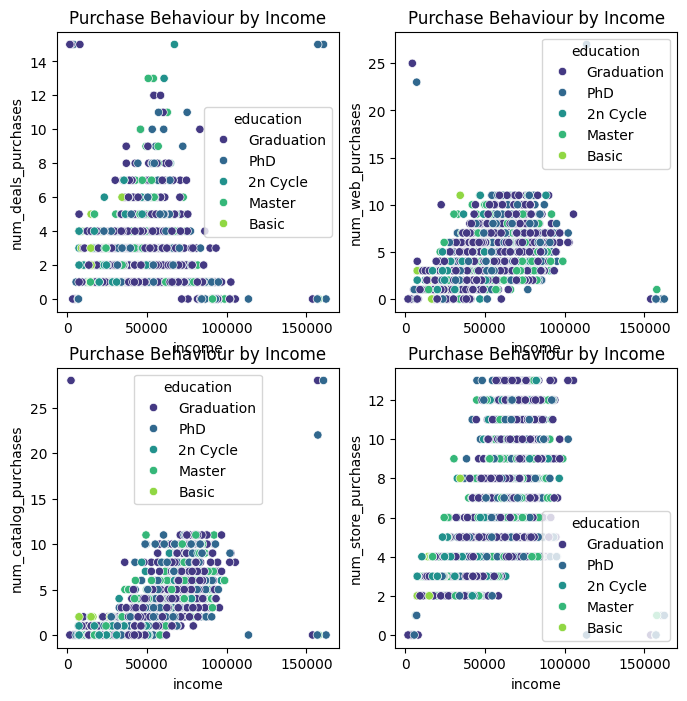

In [33]:
num_purchases_cols = ["num_deals_purchases", "num_web_purchases", "num_catalog_purchases", "num_store_purchases"]
plot = 0
fig = plt.figure(figsize=(8,8))
for i in range(len(num_purchases_cols)):
    plot += 1
    plt.subplot(2,2,plot)
    sns.scatterplot(x=marketing_data["income"], y=marketing_data[num_purchases_cols[i]], hue=marketing_data["education"], palette="viridis")
    plt.title("Purchase Behaviour by Income")
plt.show()

We observe a fairly strong positive linear relationship between income and the following three variables:
* num_web_purchases
* num_store_purchases
* num_catalog_purchases

There is no obvious relationship between income and num_deals_purchases. We can not decipher any patterns associated with education in the plots, so we need to do some further analysis on this.

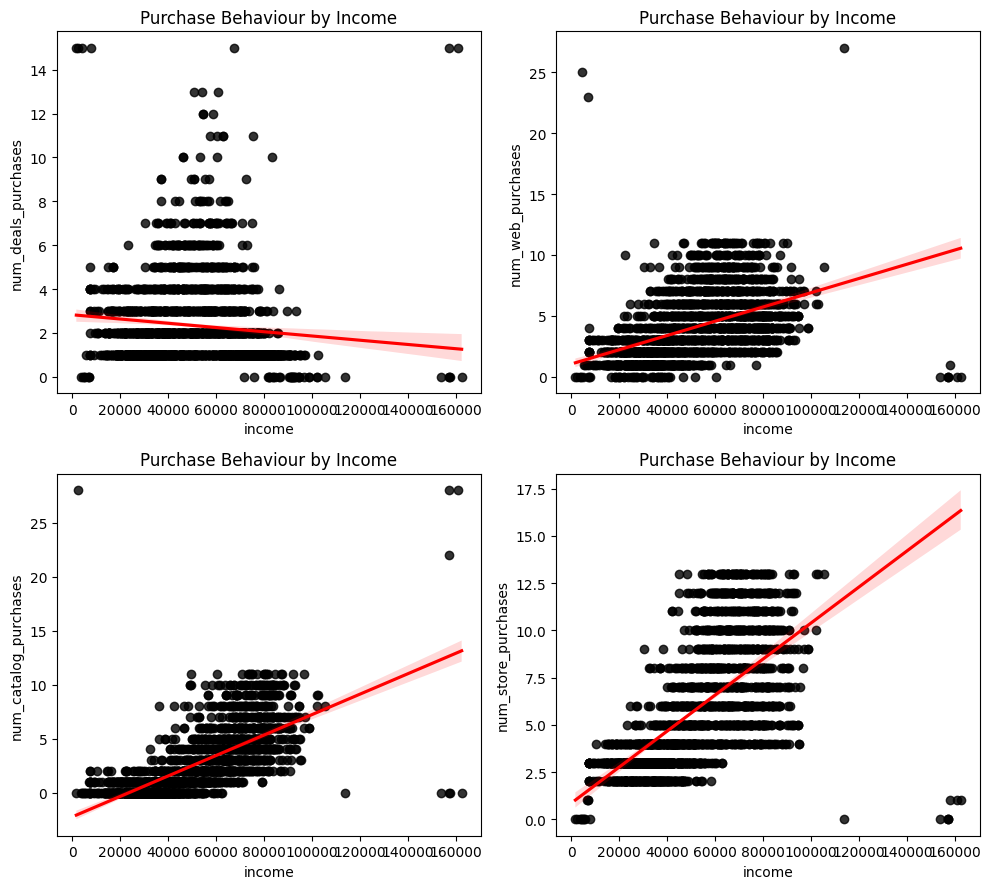

In [39]:
num_purchases_cols = ["num_deals_purchases", "num_web_purchases", "num_catalog_purchases", "num_store_purchases"]

fig = plt.figure(figsize=(10, 9))
plot = 0
for i in range(len(num_purchases_cols)):
    plot += 1
    plt.subplot(2,2,plot)
    sns.regplot(x=marketing_data["income"], y=marketing_data[num_purchases_cols[i]], scatter_kws={'color':'black'}, line_kws={'color':'red'})
    plt.title("Purchase Behaviour by Income")
plt.tight_layout()
plt.show()

To get a better look into the linear relationship, .regplot() is used. num_catalog_purchases and num_store_purchases have the strongest positive, linear relationship with income.

These plots also show that income and num_deals_purchases have a linear, negative relationship; however, the relationship is not as strong as the positive relationship between income and num_store_purchases or the others so we can't be conclusive.

Further analyzing, a new column in the DataFrame called total_purchases is added to the marketing_data DataFrame. It is the sum of all the num_{type}_purchases columns. The same analysis with .scatterplot() and .regplot() plot methods is done on this new column.

In [40]:
# adding new total_purchases column to the dataframe
marketing_data['total_purchases'] = marketing_data['num_deals_purchases'] + marketing_data['num_web_purchases'] + marketing_data['num_store_purchases']

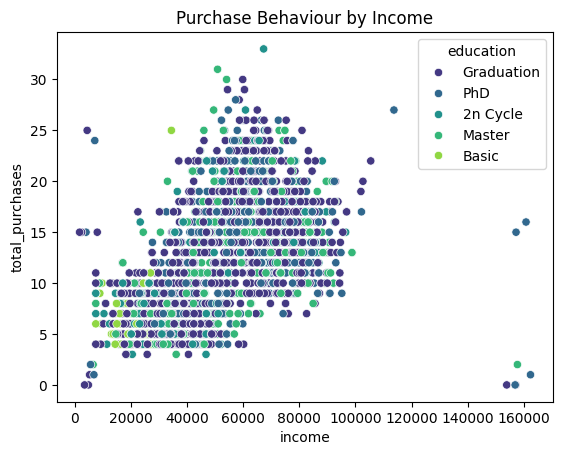

In [41]:
plt.figure()
sns.scatterplot(x=marketing_data['income'], y=marketing_data['total_purchases'], hue=marketing_data['education'], palette='viridis')
plt.title("Purchase Behaviour by Income")
plt.show()

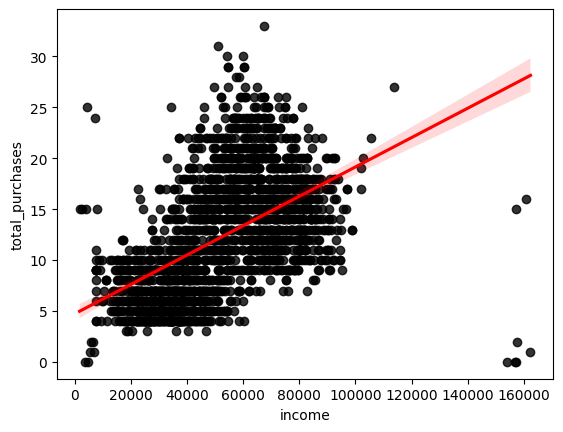

In [42]:
plt.figure()
sns.regplot(x=marketing_data["income"], y=marketing_data["total_purchases"], scatter_kws={'color':'black'}, line_kws={'color':'red'})
plt.show()

The overall relationship between income and total_purchases is strong and linear. Unfortunately, it is still hard to decipher any relationship with the education and total_purchases as the points are scattered.

# More Purchasing Behaviour by Income
The following will look into the relationship between income and mnt_{type}_produts.

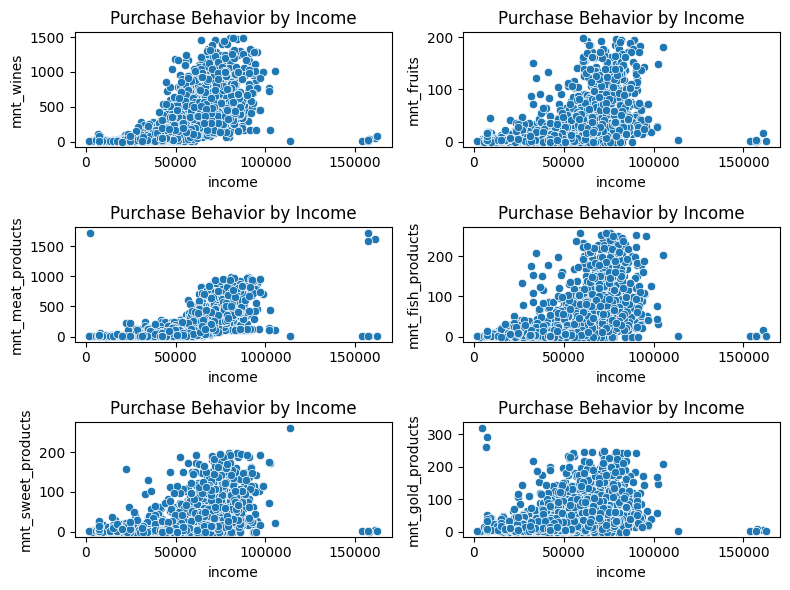

In [44]:
amounts_list = ['mnt_wines', 'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products', 'mnt_gold_products']
plot = 0
fig = plt.figure(figsize=(8,6))
for i in range(len(amounts_list)):
    plot += 1
    ax = plt.subplot(3, 2, plot)
    sns.scatterplot(y=marketing_data[amounts_list[i]], x=marketing_data['income'])
    plt.title('Purchase Behavior by Income')
plt.tight_layout()
plt.show()

The plots above all show a positive correlation between the two variables. Although we don't have enough visual evidence to see that it is linear. For further analysis, we can use the log scale.

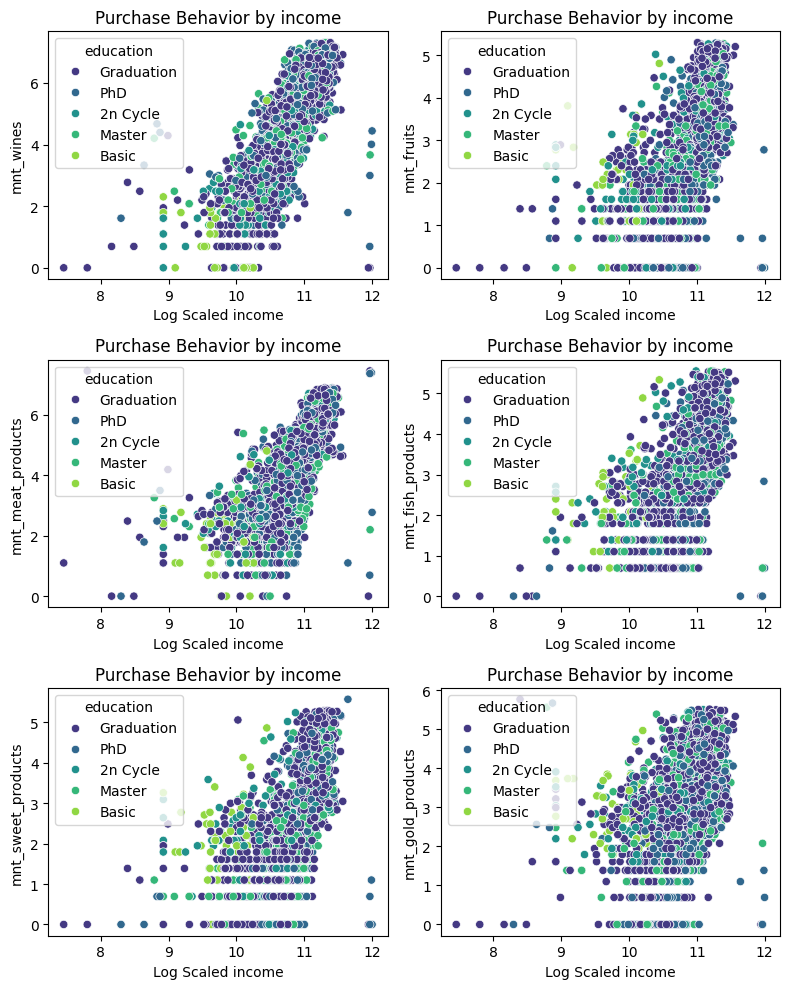

In [45]:
amounts_list = ["mnt_wines", "mnt_fruits", "mnt_meat_products", "mnt_fish_products", "mnt_sweet_products", "mnt_gold_products"]
axes = [None for column in amounts_list]
plot = 0
fig = plt.figure(figsize=(8,10))
for i in range(len(amounts_list)):
    plot += 1
    ax = plt.subplot(3, 2, plot)
    sns.scatterplot(y=np.log(marketing_data[amounts_list[i]]), x=np.log(marketing_data["income"]), 
                    hue=marketing_data["education"], palette="viridis")
    ax.set_xlabel("Log Scaled income")
    plt.title("Purchase Behavior by income")
plt.tight_layout()
plt.show()

With the log scaled variables, we see that there is a fairly strong linear, positive relationship between the variables across the board. It is still not evident how education plays a role.

# Purchasing Behaviour by Education and Income
A seaborn method called .FacetGrid() is used to see how education effects purchasing behaviour along with income. It gives a much clearer picture than the hue parameter in previous plots. In this analysis, a loop and a dynamic Python variable are used to plot six sets of .FacetGrid() plots.

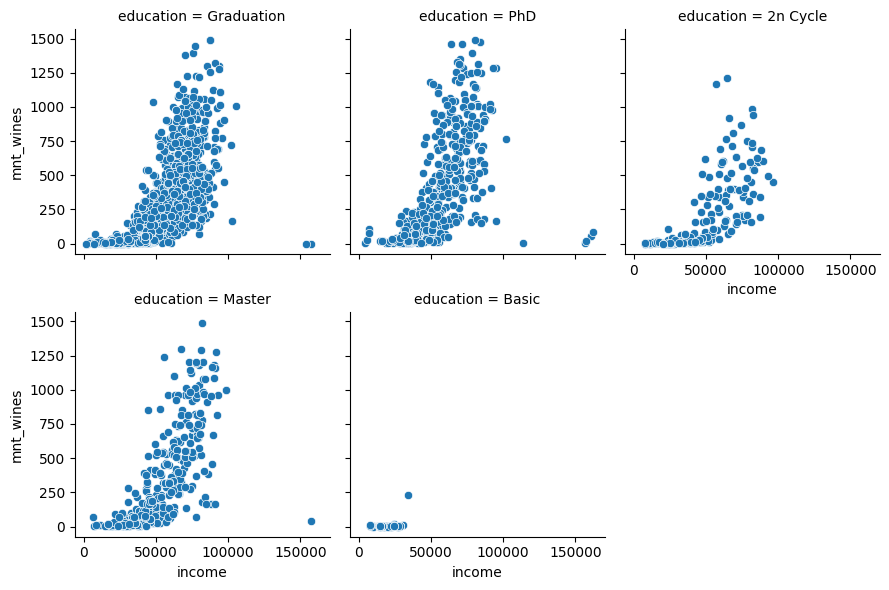

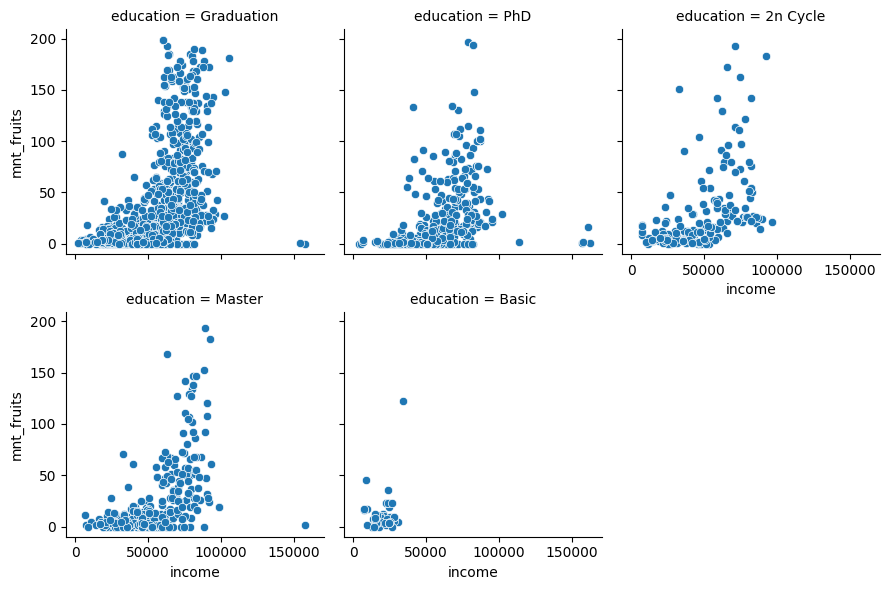

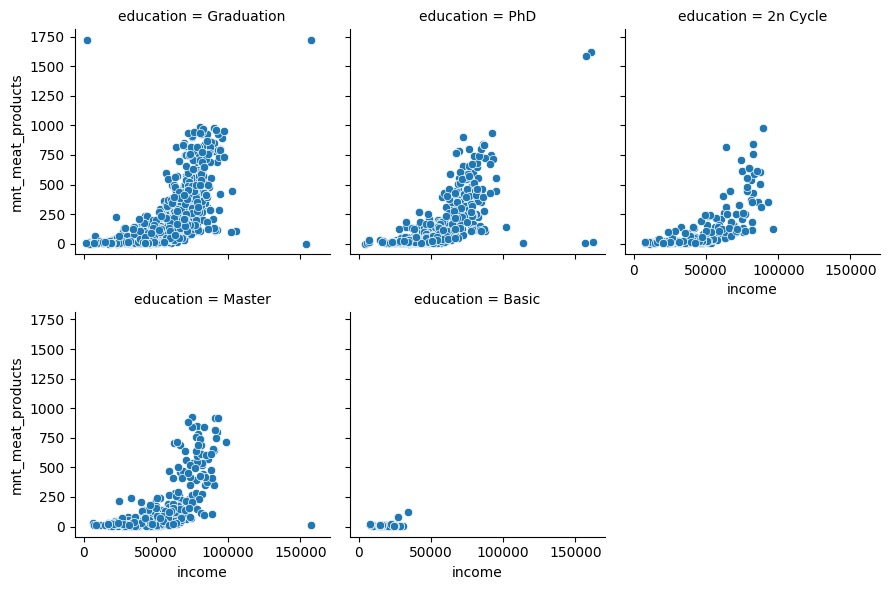

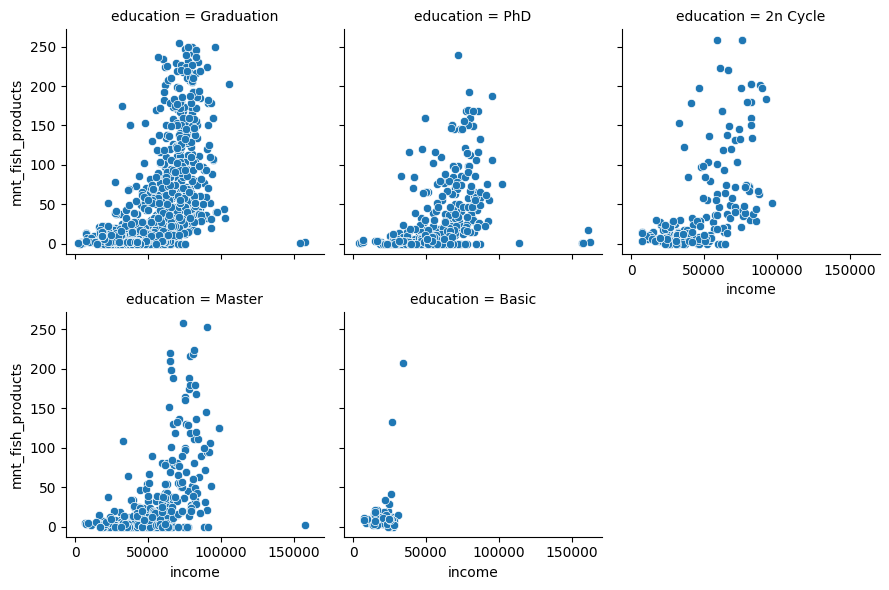

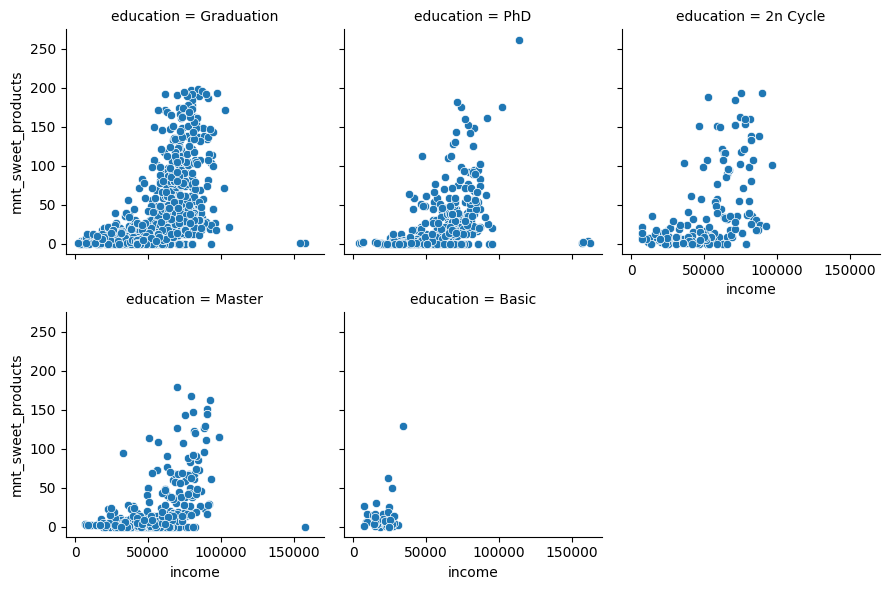

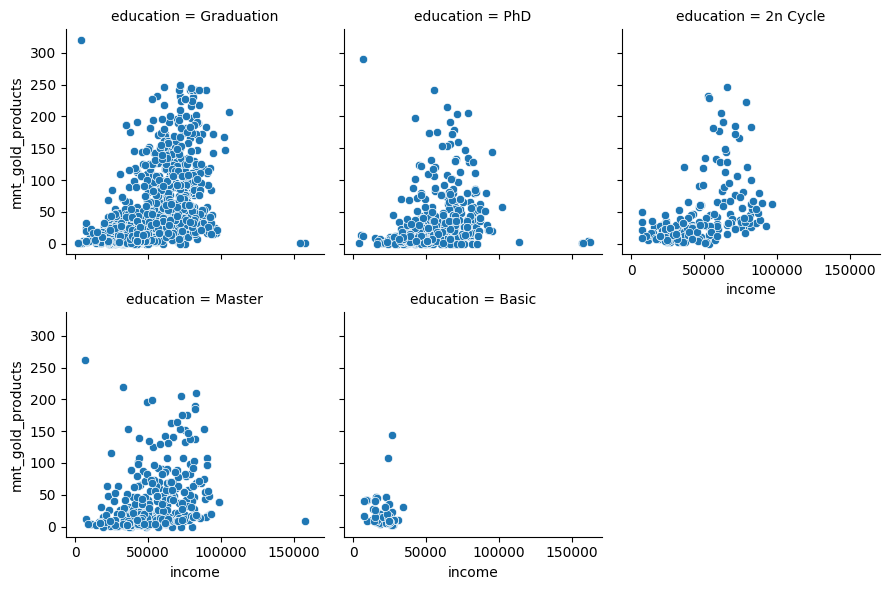

In [46]:
variable_names = {}
amounts_list = ["mnt_wines", "mnt_fruits", "mnt_meat_products", "mnt_fish_products", "mnt_sweet_products", "mnt_gold_products"]

for i in range(len(amounts_list)):
    variable_names["g{0}".format(i)] = sns.FacetGrid(marketing_data, col='education', col_wrap=3)
    variable_names["g{0}".format(i)].map(sns.scatterplot, "income",amounts_list[i])
plt.show()

After observing the plots detailing the relationship betweem income, education, and purchasing behaviour, we can see the following:
* This store does not have any shoppers with a Basic education level.
* Regardless of the shopper's educational level, there is a positive, linear relationship for each mnt_{type}_products.
* mnt_wines has the strongest positive, linear relationship with education by income.

# Purchasing behaviour by Age
The last main section of this project is to look at the purchasing behaviour of the different age groups. The scatterplot() function is used to plot the data.

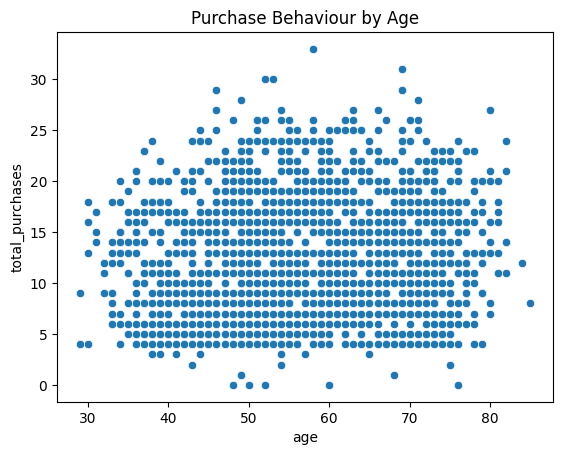

In [47]:
plt.figure()
sns.scatterplot(x=marketing_data['age'], y=marketing_data['total_purchases'])
plt.title('Purchase Behaviour by Age')
plt.show()

It is hard to see any relationship between income and total_purchases.

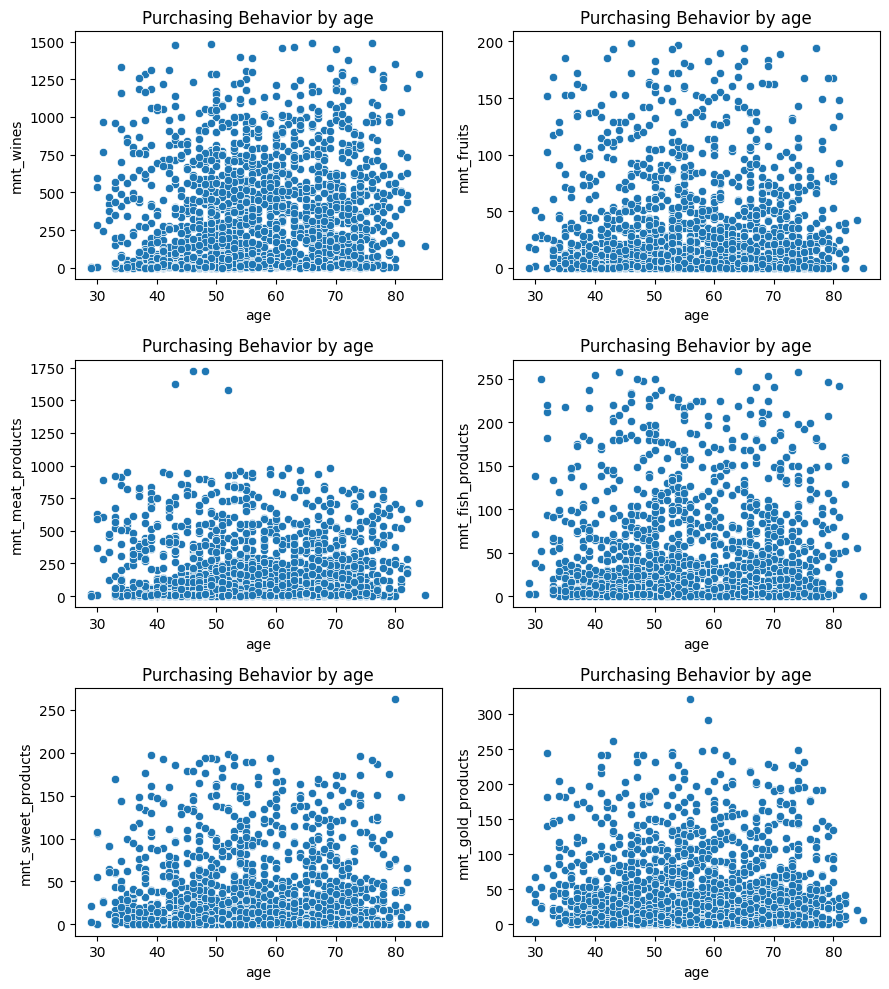

In [48]:
# amounts columns list
amounts_list = ["mnt_wines", "mnt_fruits", "mnt_meat_products", "mnt_fish_products", "mnt_sweet_products", "mnt_gold_products"]
plot = 0
fig = plt.figure(figsize=(9,10))
# looping through the length of the amounts columns list
for i in range(len(amounts_list)):
    plot += 1
    # setting up the subplots
    ax = plt.subplot(3, 2, plot)
    # plotting amounts purchased vs. income
    sns.scatterplot(y= marketing_data[amounts_list[i]], x=marketing_data["age"])
    plt.title("Purchasing Behavior by age")
plt.tight_layout()
plt.show()

Again, we cannot see any meaningful relationship between income and total number of purchases.

To further our analysis, we make a new column called 'age_group' that categorizes the age of the customer into different groups based on their age. We use the following age groups:
* 22-35
* 36-50
* 51-65
* 66 and Older

In [62]:
# function that breaks up each age into a group
def age_group(age):
    if 22 <= age <= 35:
        return '22 to 35'
    elif 35 < age <=50:
        return '36 to 50'
    elif 50 < age <=65:
        return '51 to 65'
    else:
        return '65 and over'
    
# applying the function to the dataframe
marketing_data['age_group'] = marketing_data['age'].apply(age_group)

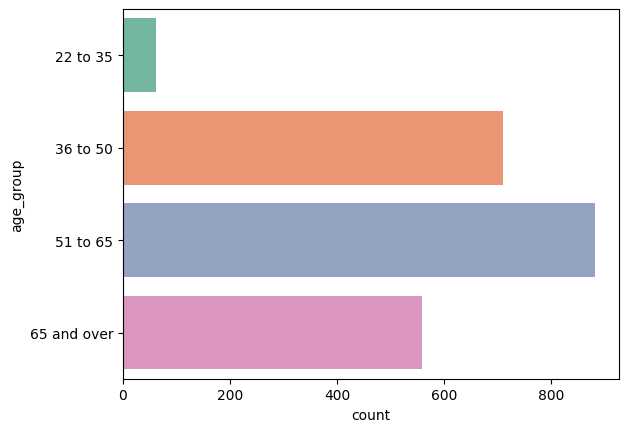

age_group
51 to 65       882
36 to 50       710
65 and over    559
22 to 35        61
Name: count, dtype: int64

In [64]:
plt.figure()
sns.countplot(marketing_data['age_group'], order=['22 to 35', '36 to 50', '51 to 65', '65 and over'], palette='Set2')
plt.show()

marketing_data['age_group'].value_counts()

The age_group variable which has proved to be much more useful than the age variable. The bar chart shows that 36 to 50 and 51 to 65 year olds are the most common groups shopping at the store.

To take it further, a new DataFrame is created, which has information about shopper age (age and age_group) and the total purchase amounts each age group buys (mnt_{type}_products). This new DataFrame will have age_groups as row data to make plotting a grouped bar easier.

In [65]:
age_plus_amounts = marketing_data.loc[:, ('age', 'mnt_wines', 'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products', 
'mnt_sweet_products', 'mnt_gold_products')]
bins = [22, 35, 50, 70, 90]
labels = ['22 to 35', '36 to 50', '51 to 65', '65 and over']

age_plus_amounts['age_group'] = pd.cut(age_plus_amounts['age'], bins=bins, labels=labels)
age_plus_amounts = age_plus_amounts.groupby('age_group').sum().reset_index()

In [66]:
print(age_plus_amounts)

     age_group    age  mnt_wines  mnt_fruits  mnt_meat_products  \
0     22 to 35   2030      20319        2360              17752   
1     36 to 50  31590     170923       18150             108165   
2     51 to 65  67088     359532       29111             181579   
3  65 and over  23355     124522        8620              61974   

   mnt_fish_products  mnt_sweet_products  mnt_gold_products  
0               3245                2161               3608  
1              25951               18814              28489  
2              40117               29268              48841  
3              13966                9584              16226  


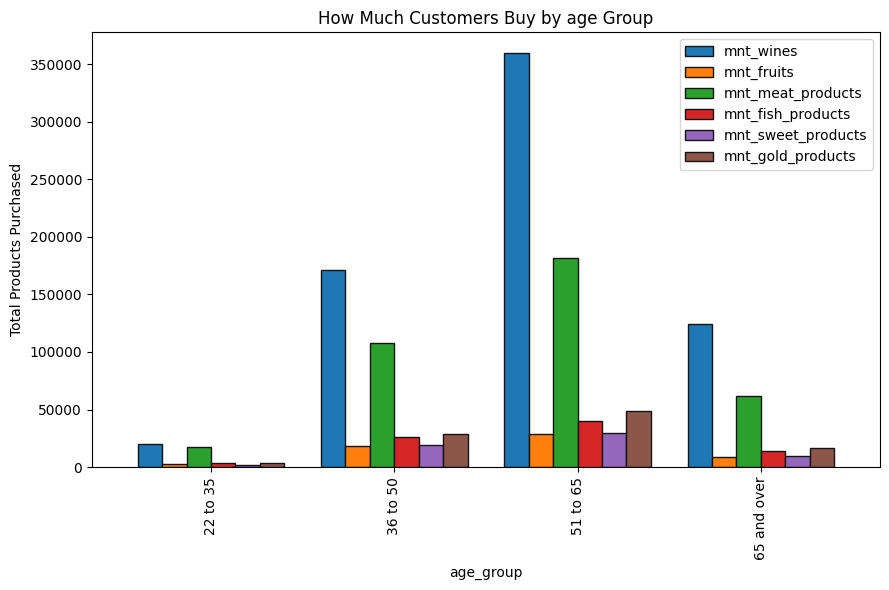

In [67]:
fig, ax = plt.subplots(figsize=(9, 6))

col_products = [
'mnt_wines', 
'mnt_fruits', 
'mnt_meat_products', 
'mnt_fish_products', 
'mnt_sweet_products', 
'mnt_gold_products'
]

# bar graph of amount of items bought in the store grouped by age group
age_plus_amounts.plot(x='age_group', y=col_products, kind='bar', ax=ax,  width=0.8, edgecolor='#131313')
plt.title("How Much Customers Buy by age Group")
plt.ylabel("Total Products Purchased")
plt.tight_layout()
plt.show()

We observe across all age groups that wine is the most popular purchase followed by meat products while fruits are the least popular.

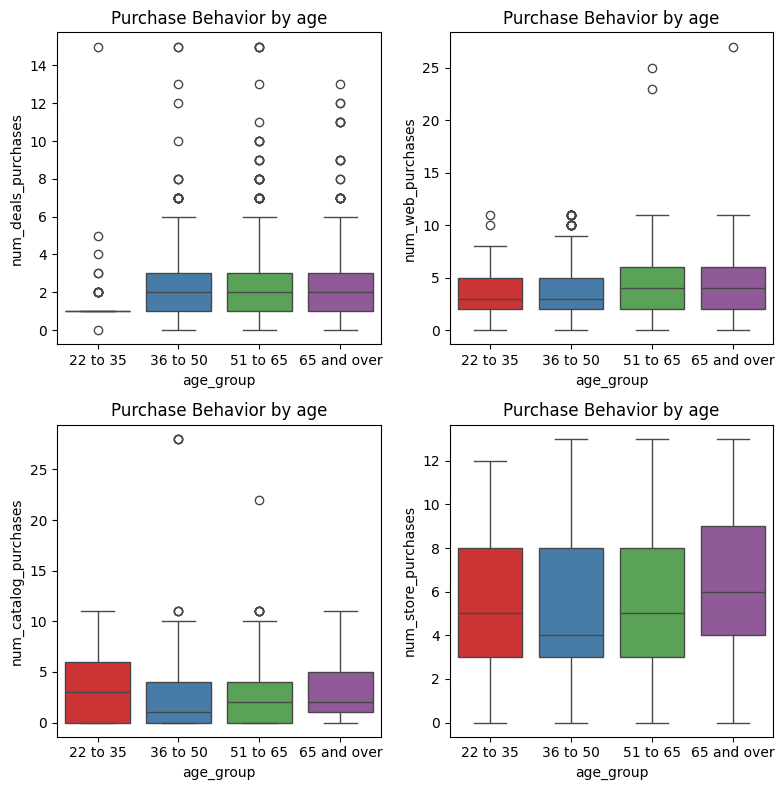

In [70]:
# num purchases columns list
num_purchases_cols = ["num_deals_purchases", "num_web_purchases", "num_catalog_purchases", "num_store_purchases"]
plot = 0
fig = plt.figure(figsize=(8,8))
# looping through the length of the list
for i in range(len(num_purchases_cols)):
    plot += 1
    # setting up the subplots
    ax = plt.subplot(2, 2, plot)
    # scatterplot of of num purchases vs. age
    sns.boxplot(x=marketing_data["age_group"], y= marketing_data[num_purchases_cols[i]], 
                order=["22 to 35", "36 to 50", "51 to 65", "65 and over"], palette='Set1')
    plt.title("Purchase Behavior by age")

plt.tight_layout()
plt.show()

This chart yields some very interesting insights. Here are some notable ones:
* `22 to 35` age group tend to be the least interested in deals.
* On average, `71 and Older` age group customers tend to shop the most online, in store, and through the catalog.
* `36 to 50` , `51 to 65` and `66 and over` age groups are interested in deals. Most likely this is because they receive more deals since they have more loyal customers and have been for longer.

This information could be super helpful for a marketing department as strategies could be used to increase `36 to 50` and `65 and over` customers for the store and also make some deals for the `22 to 35` age group.

# Hypothesis Testing
1. Income and Spending Behavior
We check whether customers with higher incomes spend significantly more on premium products(wines, meat products) than customers with lower incomes.

* `Test`: Independent t-test or ANOVA comparing spending across income quartiles.
* `Variables`: Income vs. MntWines, MntMeatProducts.

Income Quartile Distribution:
income_quartile
Q1_Low            553
Q2_Medium_Low     553
Q3_Medium_High    554
Q4_High           552
Name: count, dtype: int64

Income ranges by quartile:
                     min       max          mean
income_quartile                                 
Q1_Low            1730.0   35196.0  25168.916817
Q2_Medium_Low    35246.0   51369.0  43042.567812
Q3_Medium_High   51373.0   68487.0  60144.981949
Q4_High          68627.0  162397.0  79513.800725
TEST 1A: INCOME QUARTILES vs WINE SPENDING
ANOVA Results for Wine Spending:
F-statistic: 821.9241
P-value: 0.000000
Significant at α=0.05: Yes

Descriptive Statistics - Wine Spending by Income Quartile:
                 count        mean         std  median
income_quartile                                       
Q1_Low             553   21.524412   34.161539    10.0
Q2_Medium_Low      553  124.936709  147.330809    68.0
Q3_Medium_High     554  439.370036  285.982084   385.5
Q4_High            552  635.673913  332.

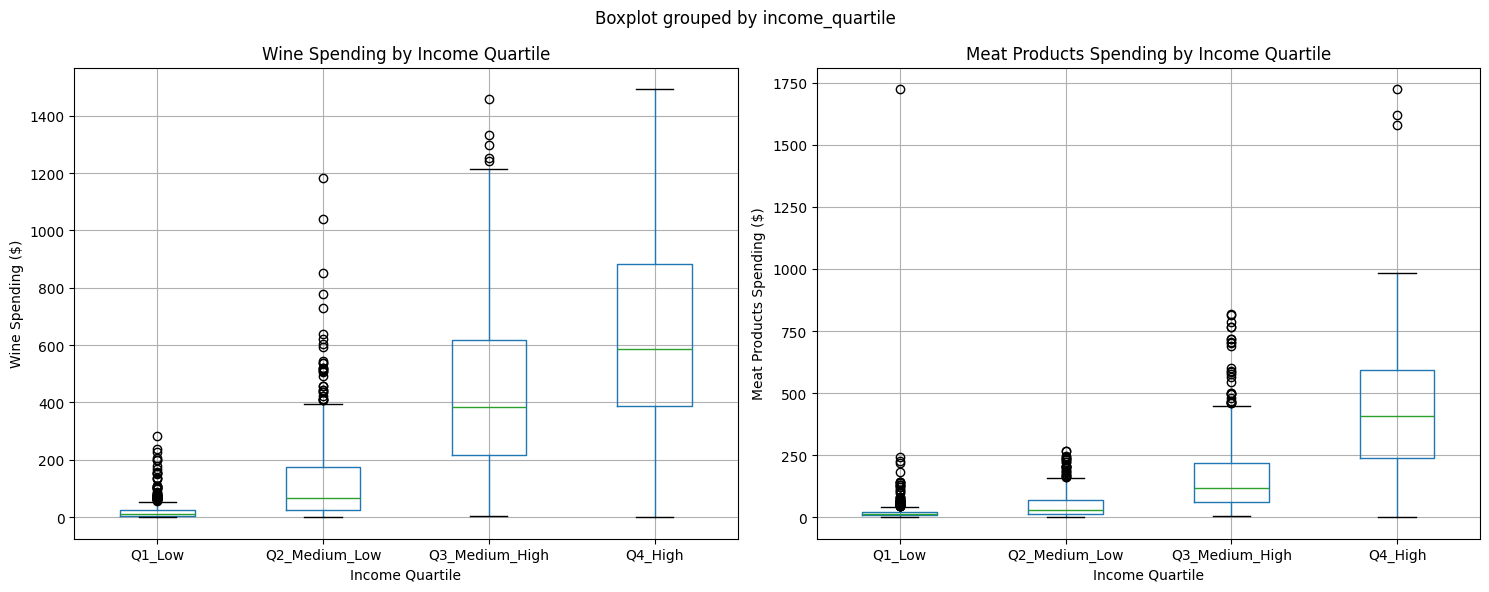

HYPOTHESIS TEST SUMMARY
Hypothesis: Higher income customers spend significantly more on premium products
Wine Spending Test: REJECT NULL (p=0.000000)
Meat Products Test: REJECT NULL (p=0.000000)


In [74]:
# Test 1: Income and Spending Behavior
# Hypothesis: Customers with higher incomes spend significantly more on premium products (wines, meat products)

from scipy import stats
import numpy as np

# Create income quartiles
marketing_data['income_quartile'] = pd.qcut(marketing_data['income'], 
                                          q=4, 
                                          labels=['Q1_Low', 'Q2_Medium_Low', 'Q3_Medium_High', 'Q4_High'])

print("Income Quartile Distribution:")
print(marketing_data['income_quartile'].value_counts().sort_index())
print("\nIncome ranges by quartile:")
print(marketing_data.groupby('income_quartile')['income'].agg(['min', 'max', 'mean']))

# Test 1a: Income vs Wine Spending
print("TEST 1A: INCOME QUARTILES vs WINE SPENDING")

# Group wine spending by income quartiles
wine_by_income = [marketing_data[marketing_data['income_quartile'] == q]['mnt_wines'].values 
                  for q in ['Q1_Low', 'Q2_Medium_Low', 'Q3_Medium_High', 'Q4_High']]

# Perform one-way ANOVA
f_stat_wine, p_value_wine = stats.f_oneway(*wine_by_income)

print(f"ANOVA Results for Wine Spending:")
print(f"F-statistic: {f_stat_wine:.4f}")
print(f"P-value: {p_value_wine:.6f}")
print(f"Significant at α=0.05: {'Yes' if p_value_wine < 0.05 else 'No'}")

# Descriptive statistics
print(f"\nDescriptive Statistics - Wine Spending by Income Quartile:")
wine_stats = marketing_data.groupby('income_quartile')['mnt_wines'].agg(['count', 'mean', 'std', 'median'])
print(wine_stats)

# Test 1b: Income vs Meat Products Spending
print("TEST 1B: INCOME QUARTILES vs MEAT PRODUCTS SPENDING")

# Group meat spending by income quartiles
meat_by_income = [marketing_data[marketing_data['income_quartile'] == q]['mnt_meat_products'].values 
                  for q in ['Q1_Low', 'Q2_Medium_Low', 'Q3_Medium_High', 'Q4_High']]

# Perform one-way ANOVA
f_stat_meat, p_value_meat = stats.f_oneway(*meat_by_income)

print(f"ANOVA Results for Meat Products Spending:")
print(f"F-statistic: {f_stat_meat:.4f}")
print(f"P-value: {p_value_meat:.6f}")
print(f"Significant at α=0.05: {'Yes' if p_value_meat < 0.05 else 'No'}")

# Descriptive statistics
print(f"\nDescriptive Statistics - Meat Products Spending by Income Quartile:")
meat_stats = marketing_data.groupby('income_quartile')['mnt_meat_products'].agg(['count', 'mean', 'std', 'median'])
print(meat_stats)

# Post-hoc analysis if significant
if p_value_wine < 0.05:
    print(f"\n" + "-"*40)
    print("POST-HOC ANALYSIS: Wine Spending")
    print("-"*40)
    from scipy.stats import tukey_hsd
    wine_tukey = tukey_hsd(*wine_by_income)
    print("Tukey HSD Results for Wine Spending:")
    print(f"P-values matrix:\n{wine_tukey.pvalue}")

if p_value_meat < 0.05:
    print(f"\n" + "-"*40)
    print("POST-HOC ANALYSIS: Meat Products Spending")
    print("-"*40)
    meat_tukey = tukey_hsd(*meat_by_income)
    print("Tukey HSD Results for Meat Products Spending:")
    print(f"P-values matrix:\n{meat_tukey.pvalue}")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Wine spending boxplot
marketing_data.boxplot(column='mnt_wines', by='income_quartile', ax=ax1)
ax1.set_title('Wine Spending by Income Quartile')
ax1.set_xlabel('Income Quartile')
ax1.set_ylabel('Wine Spending ($)')

# Meat spending boxplot
marketing_data.boxplot(column='mnt_meat_products', by='income_quartile', ax=ax2)
ax2.set_title('Meat Products Spending by Income Quartile')
ax2.set_xlabel('Income Quartile')
ax2.set_ylabel('Meat Products Spending ($)')

plt.tight_layout()
plt.show()

# Summary
print("HYPOTHESIS TEST SUMMARY")
print(f"Hypothesis: Higher income customers spend significantly more on premium products")
print(f"Wine Spending Test: {'REJECT NULL' if p_value_wine < 0.05 else 'FAIL TO REJECT NULL'} (p={p_value_wine:.6f})")
print(f"Meat Products Test: {'REJECT NULL' if p_value_meat < 0.05 else 'FAIL TO REJECT NULL'} (p={p_value_meat:.6f})")

# Model Building

## Customer Segmentation using K-Means Clustering

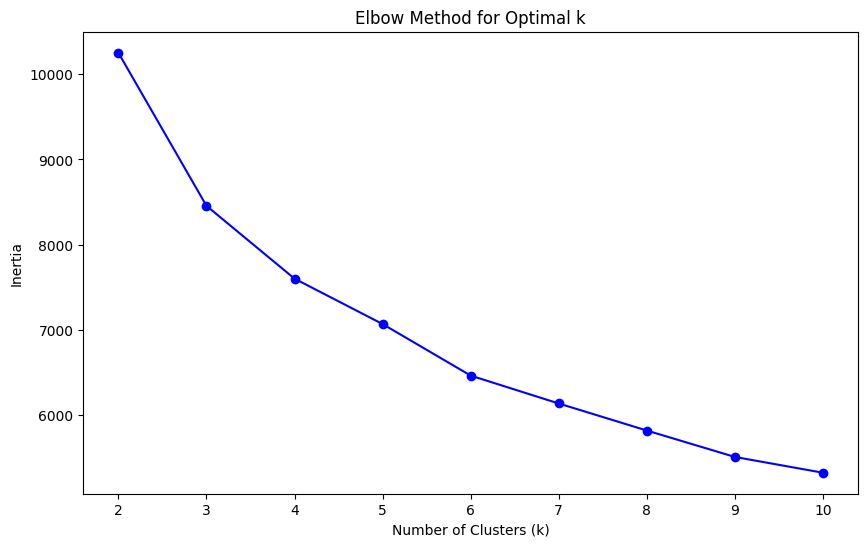

In [79]:
# Customer Segmentation using K-Means
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select features for clustering
features = ['income', 'age', 'total_purchases', 'mnt_wines', 'mnt_meat_products', 
           'num_web_purchases', 'num_store_purchases', 'num_web_visits_month']

# Prepare data
X = marketing_data[features].fillna(marketing_data[features].mean())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find optimal clusters using elbow method
inertias = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Campaign Response Prediction (Classification) using Random Forest

In [88]:
# Predict campaign response using Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Create target variable (any campaign accepted)
marketing_data['campaign_responder'] = (
    (marketing_data['accepted_cmp1'] == 1) | 
    (marketing_data['accepted_cmp2'] == 1) | 
    (marketing_data['accepted_cmp3'] == 1) | 
    (marketing_data['accepted_cmp4'] == 1) | 
    (marketing_data['accepted_cmp5'] == 1) | 
    (marketing_data['response'] == 1)
).astype(int)

# Features for prediction
feature_cols = ['income', 'age', 'education', 'total_purchases', 
               'mnt_wines', 'mnt_meat_products', 'recency', 'num_web_visits_month']

X = pd.get_dummies(marketing_data[feature_cols], drop_first=True)
y = marketing_data['campaign_responder']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       320
           1       0.74      0.54      0.63       123

    accuracy                           0.82       443
   macro avg       0.79      0.73      0.75       443
weighted avg       0.81      0.82      0.81       443



# Customer Lifetime Value Prediction (Regression) using Deep Learning

In [82]:
# Predict total spending using Neural Network
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

# Create total spending target
marketing_data['total_spending'] = (marketing_data['mnt_wines'] + 
                                   marketing_data['mnt_fruits'] + 
                                   marketing_data['mnt_meat_products'] + 
                                   marketing_data['mnt_fish_products'] + 
                                   marketing_data['mnt_sweet_products'] + 
                                   marketing_data['mnt_gold_products'])

# Features
features = ['income', 'age', 'recency', 'num_web_visits_month', 
           'num_web_purchases', 'num_store_purchases']

X = marketing_data[features].fillna(marketing_data[features].mean())
y = marketing_data['total_spending']

# Scale features
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Build neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model
history = model.fit(X_train, y_train, epochs=200, batch_size=64, 
                   validation_split=0.2, verbose=0)

# Evaluate
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MAE: {test_mae:.4f}")

Test MAE: 0.2474


# Recommendation System

In [86]:
# Product recommendation based on customer similarity
from sklearn.metrics.pairwise import cosine_similarity

# Create customer-product matrix
product_cols = ['mnt_wines', 'mnt_fruits', 'mnt_meat_products', 
               'mnt_fish_products', 'mnt_sweet_products', 'mnt_gold_products']

customer_product_matrix = marketing_data[product_cols].fillna(0)

# Calculate customer similarity
customer_similarity = cosine_similarity(customer_product_matrix)

def recommend_products(customer_id, n_recommendations=5):
    # Find similar customers
    similarities = customer_similarity[customer_id]
    similar_customers = similarities.argsort()[-6:-1][::-1]  # Top 5 similar
    
    # Get their product preferences
    recommendations = {}
    for product in product_cols:
        avg_spending = marketing_data.iloc[similar_customers][product].mean()
        current_spending = marketing_data.iloc[customer_id][product]
        if avg_spending > current_spending:
            recommendations[product] = avg_spending - current_spending
    
    return sorted(recommendations.items(), key=lambda x: x[1], reverse=True)

# Example recommendation
print("Product recommendations for customer 2:")
print(recommend_products(2))

Product recommendations for customer 2:
[('mnt_wines', np.float64(241.60000000000002)), ('mnt_meat_products', np.float64(95.6)), ('mnt_gold_products', np.float64(48.2)), ('mnt_fruits', np.float64(12.600000000000001)), ('mnt_fish_products', np.float64(12.600000000000001)), ('mnt_sweet_products', np.float64(9.8))]
